## The analysis of this case study dataset follows the 6 steps of data analysis I learnt in the Google Data Analysis Certificate program - Ask, Prepare, Process, Analyse, Share and Act

## STEP 1: ASK

### In this step, I define the problem and objectives of the case study and it's desired outcome.

## 1.0 Background
### Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urska Srsen, the cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

### I have been asked to focus on one of Bellabeat's products and analyze smart device data to gain insights into how consumers are using their smart devices. The insights I glean from the data will be shared along with high-level recommendations to help guide the marketing strategy for the company. 

## 1.1  Business Task
### Analyze Fitbit fitness tracker data to gain insights into how customers are using the FitBit app and discover trends to support Bellabeat's marketing strategy.

## 1.2 Deliverables
### - A clear summary of the business task
### - A description of all data sources used
### - Documentation of any cleaning or manipulation of data
### - A summary of analysis with supporting visuals and key findings
### - High-level recommendations based on my analysis

## STEP 2: PREPARE
### In this step, I identify the data being used and some of it's limitations.

## 2.1 Information on data source

### 1. Data is publicly available on Kaggle (FitBit Fitness Tracker Data) and stored in 18 csv files.
### 2. It was generated by respondents from a survey via Amazon Mechanical Turk between 12 March 2016 - 12 May 2016
### 3. 30 FitBit users consented to the submission of personal tracker data.
### 4. Data collected includes physical activity recorded in minutes, daily activity, sleep monitoring, heart rate and steps.

## 2.2 Limitations of the Data set

### - Data was collceted in 2016. User's daily activity, fitness, sleeping habits, diet and food consumption may have changed since then. Therefore data may not be timely or relevant.
### - Sample size of 30 FitBit users is not representative of the entire fitness population.
### - Unable to ascertain the integrity or accuracy of the data.

### A good data source is Reliable, Original, Comprehensive, Curent and Cited. For this dataset;
### - Reliable: It is not reliable, as it has only 30 respondents
### - Comprehensive: Paramenters match most of Bellabeat's product parameter.
### - Current: Data is 5 years old and may not be relevant
### - Cited: Data is collected from third party, hence unknown.

### Overall, the dataset is considered bad quality data and it is not recommended to produce business recommendations based on this data.

## STEP 3: PROCESS

### In this step, I will prepare the data by cleaning and ensuring that it is correct, relevant, complete and free of inconsistencies and outliers, by checking for and treating missing or null values, transform the data and perform preliminary statistical analysis. 

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime as dt

In [2]:
# read the csv file
daily_activity = pd.read_csv('dailyActivity_merged.csv', delimiter=',')

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# obtain the number of missing data per column
missing_values_count = daily_activity.isnull().sum()
missing_values_count

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [5]:
# show basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
Id                          940 non-null int64
ActivityDate                940 non-null object
TotalSteps                  940 non-null int64
TotalDistance               940 non-null float64
TrackerDistance             940 non-null float64
LoggedActivitiesDistance    940 non-null float64
VeryActiveDistance          940 non-null float64
ModeratelyActiveDistance    940 non-null float64
LightActiveDistance         940 non-null float64
SedentaryActiveDistance     940 non-null float64
VeryActiveMinutes           940 non-null int64
FairlyActiveMinutes         940 non-null int64
LightlyActiveMinutes        940 non-null int64
SedentaryMinutes            940 non-null int64
Calories                    940 non-null int64
dtypes: float64(7), int64(7), object(1)
memory usage: 110.3+ KB


In [6]:
# count distinct value
unique_id = len(pd.unique(daily_activity["Id"]))

In [7]:
print("Number of unique Id = " + str(unique_id))

Number of unique Id = 33


#### From the above observations, you note that;
#### 1. There are no null or missing values
#### 2. The data has 15 columns and 940 rows
#### 3. ActivityDate column is wrongly classified as 'object' dtype as against 'datetime64' dtype and has to be converted
#### 4. There are 33 unique IDs, rather than 30 unique IDs as expected. Some users may have created additional IDs during the survey.

#### Now that I have identified the dirty data, I will then proceed to perform the following data transformations or manipulations

In [8]:
# convert "ActivityDate" to datetime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"],format="%m/%d/%Y")

In [9]:
# re-print information to confirm
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
Id                          940 non-null int64
ActivityDate                940 non-null datetime64[ns]
TotalSteps                  940 non-null int64
TotalDistance               940 non-null float64
TrackerDistance             940 non-null float64
LoggedActivitiesDistance    940 non-null float64
VeryActiveDistance          940 non-null float64
ModeratelyActiveDistance    940 non-null float64
LightActiveDistance         940 non-null float64
SedentaryActiveDistance     940 non-null float64
VeryActiveMinutes           940 non-null int64
FairlyActiveMinutes         940 non-null int64
LightlyActiveMinutes        940 non-null int64
SedentaryMinutes            940 non-null int64
Calories                    940 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(7)
memory usage: 110.3 KB


In [10]:
daily_activity["ActivityDate"].head()

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [11]:
# create new list of rearranged columns
new_cols = ['Id','ActivityDate','DayoftheWeek','TotalSteps','TotalDistance','TrackerDistance','LoggedActivitiesDistance',
           'VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance',
           'VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','TotalExerciseMinutes',
           'TotalExerciseHours','Calories']

In [12]:
# reindex function to rearrange columns based on "new_cols"
df_activity = daily_activity.reindex(columns=new_cols)

In [13]:
# print first 5 rows to confirm
df_activity.head()

,Id,ActivityDate,DayoftheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [14]:
# create new column "day_of_the_week" to represent day of the week
df_activity["DayoftheWeek"] = df_activity["ActivityDate"].dt.day_name()

In [15]:
# print first 5 rows to confirm
df_activity["DayoftheWeek"].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayoftheWeek, dtype: object

In [16]:
# rename columns
df_activity.rename(columns = {'Id':'id','ActivityDate':'date','DayoftheWeek':'day_of_the_week','TotalSteps':'total_steps',
                              'TotalDistance':'total_dist','TrackerDistance':'track_dist','LoggedActivitiesDistance':'logged_dist',
           'VeryActiveDistance':'very_active_dist','ModeratelyActiveDistance':'moderate_active_dist','LightActiveDistance':'light_active_dist',
                              'SedentaryActiveDistance':'sedentary_active_dist',
           'VeryActiveMinutes':'very_active_mins','FairlyActiveMinutes':'fairly_active_mins','LightlyActiveMinutes':'light_active_mins',
                              'SedentaryMinutes':'sedentary_mins','TotalExerciseMinutes':'total_mins',
           'TotalExerciseHours':'total_hours','Calories':'calories'},inplace = True)

In [18]:
print(df_activity.columns.values)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'light_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


In [19]:
df_activity.head()

,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,light_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [20]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["light_active_mins"] + df_activity["sedentary_mins"]

In [21]:
df_activity["total_mins"].head()

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [22]:
# create new column "total_hours" by converting to hour and round float to 2 decimal places
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)

In [23]:
# print first 5 rows to confirm
df_activity["total_hours"].head()

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

#### The Data cleaning and manipulation is complete. Therefore, the data is ready for analysis.

## STEP 4: ANALYSE

In [24]:
# pull general statistics
df_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,light_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


#### Interpreting the statiscal results above;
#### 1. On average, users logged approximately 7,638 steps or 5.5km which is adequate. As per the Centre for Disease Control, an adult female has to aim at least 10,000 steps or 8km per day to benefit their general health, weight loss and fitness.
#### 2. Sedentary users are the majority, logging on average 991 mins or 20 hours making up 81% of total average mins.
#### 3. The average calories burned is 2,303 calories which is equivalent 0.6 pound.

## Step 5: Share

#### For this step, I created visualizations and communicate my findings based on my analysis

## Data Visualization and Findings

In [25]:
# import matplotlib package
import matplotlib.pyplot as plt

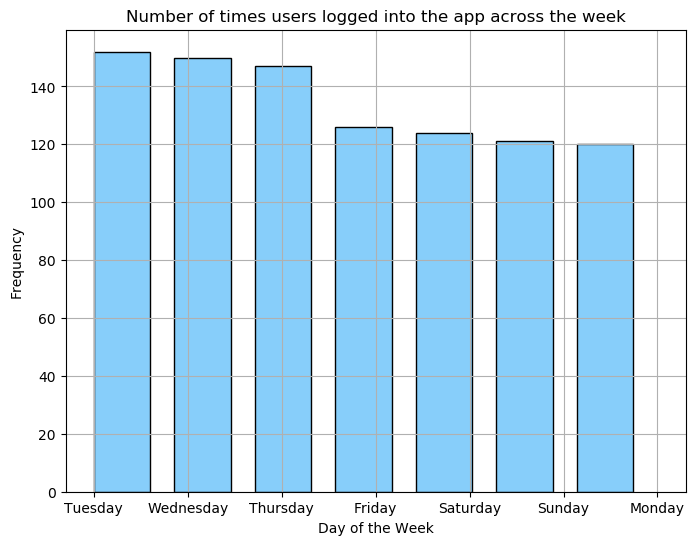

In [29]:
# Plotting a histogram
plt.style.use("default")
plt.figure(figsize=(8,6)) # specifies size of chart
plt.hist(df_activity.day_of_the_week, bins = 7, width = 0.6, color = "lightskyblue", edgecolor = "black")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.title("Number of times users logged into the app across the week")
plt.grid(True)
plt.show()

#### In the histogram above, you see the following things;
#### 1. Users prefer or remember to track their activity on the app during the midweek (Tuesday to Friday). 
#### 2. Notice that the frequency drops off on Friday and continues to do so on weekends to Monday.

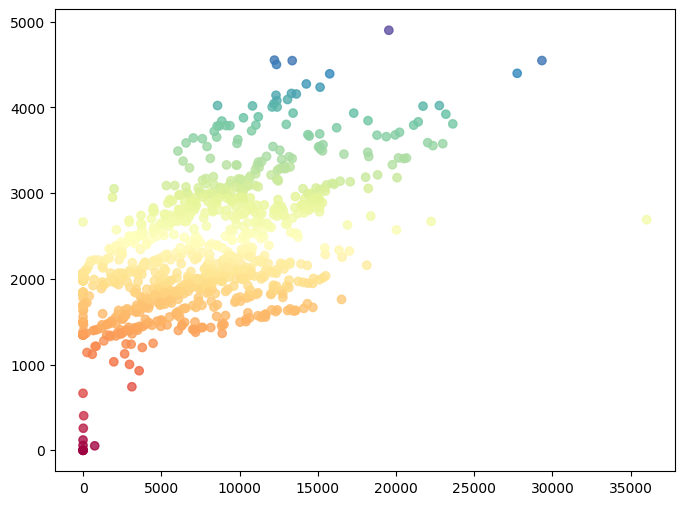

In [30]:
# plotting a scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df_activity.total_steps, df_activity.calories, alpha = 0.8, c = df_activity.calories, cmap = "Spectral")

In [31]:
# From the plot above
median_calories = 2303
median_steps = 7637

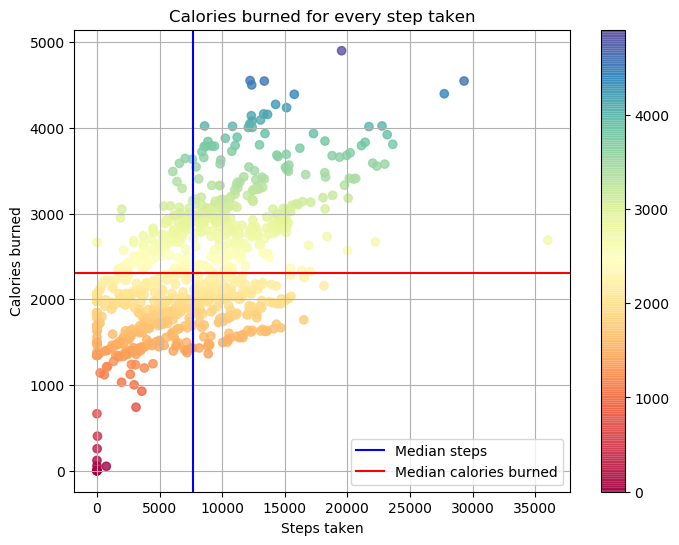

In [34]:
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df_activity.total_steps, df_activity.calories, alpha = 0.8, c = df_activity.calories, cmap = "Spectral")
# Adding annotations to the visual
plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

#### From the scatter plot above, I discovered that;
#### 1. It is a positive correlation, as the steps taken increases so does the calories burned.
#### 2. The intensity of calories burned increases when users are at the range of > 0 to 15,000 steps with the rate of calories burn coming down from 15,000 steps above.

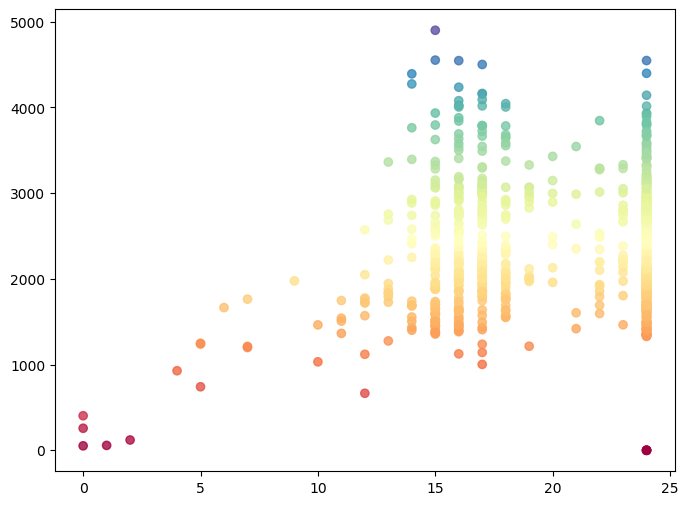

In [35]:
# plotting a scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df_activity.total_hours, df_activity.calories, alpha = 0.8, c = df_activity.calories, cmap = "Spectral")

In [36]:
# From the plot above
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

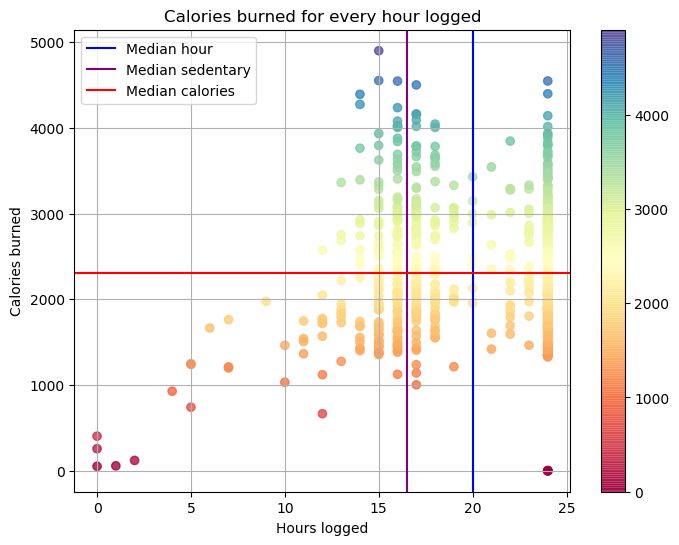

In [37]:
plt.style.use("default")
plt.figure(figsize=(8,6))
plt.scatter(df_activity.total_hours, df_activity.calories, alpha = 0.8, c = df_activity.calories, cmap = "Spectral")
# Adding annotations to the visual
plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median hour")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median calories")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.grid(True)
plt.legend()
plt.show()

#### The scatter plot above shows the following:
#### 1. A weak positive correlation where an increase of hours logged does not translate to more calories being burned. This is largely due to the average sedentary hours (purple line) plotted.

In [39]:
# calculate total of individual minutes column
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
light_active_mins = df_activity["light_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

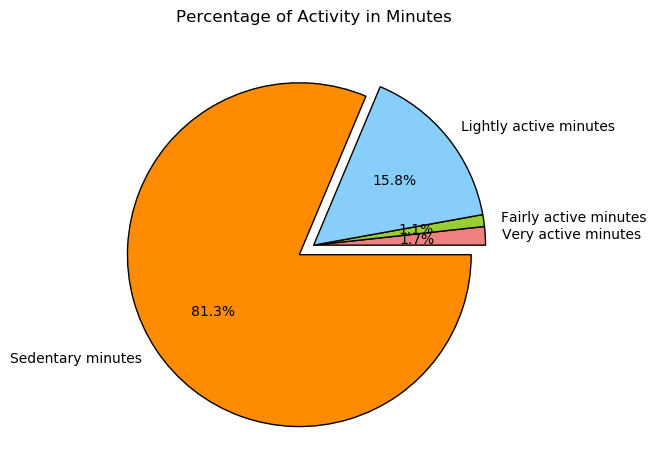

In [40]:
# plot a pie chart
slices = [very_active_mins, fairly_active_mins, light_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, colors = colours, wedgeprops = {"edgecolor":"black"}, explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

#### As observed from the pie chart;
#### 1. Sedentary minutes takes the largest share
#### 2. This could be interpreted to mean that users are using the FitBit app to log daily activities such as daily commute, inactive movements.
#### 3. The app is used enough to track fitness (such as running) as you can see with the very low percentage of Fairly active minutes (1.1%) and Very active minutes (1.7%).

## STEP 6: ACT

#### In this last step, I will be providing high-level recommendations to support Bellabeat's marketing strategies based on my analyses above.

### 1. The trends identified
##### - Majority of users (81.3%) use the FitBit app to ttrack sedentary activities as against using it to track their health habits.
##### - Users prefer to use the app during the weekdays as compared to weekends.

### 2. How can these trends help influence Bellabeat's marketing strategies?
##### - The marketing team should focus on equipping users with knowledge about fitness benefits, suggest different types of exercise, provide information on calories intake and burnt rate on the Bellabeat app.
##### - The Bellabeat app can prompt users on weekends to exercise.
##### -  Clearly convey to users the capabilities of the various products in the Bellabeat ecosystem and the information these devices collect.
##### - Leverage these competitive advantages to differentiate the Bellabeat brand from other smart device companies.